In [1]:
import pandas as pd #para trabalhar com dataframes

In [2]:
import numpy as np # para calculos em vetor unidimensional(array, lista) e multidimensional(matriz)

In [3]:
import warnings
warnings.filterwarnings('ignore') #desabilita a exibição de alguns warnings

agora vamos ler uma base em csv e jogar num dataframe do pandas

In [4]:
df_pd = pd.read_csv(r"C:\Users\mvaug\Desktop\4linux\arquivos\IRIS.csv") #função do pandas que retorna um dataframe

na linha acima, tem um r minusculo antes do endereço do arquivo, isso é para gerar uma raw string, se não o windows converte o caminho do jeito dele e não encontra o arquivo

In [5]:
df_pd # amostra do dataframe head e tail 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
df_pd.shape #mostra dimensões do dataframe, linhas e colunas

(150, 5)

In [7]:
df_pd.columns #pega o nome das colunas

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
 df_pd.head() #cabeça, primeiros itens

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
df_pd.tail() # cauda, ultimos itens

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [10]:
df_pd.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
df_pd.values

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [5.0, 3.0, 1.6, 0.

In [12]:
df_pd.describe() #é tipo o summary do rstudio, muito útil

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df_pd.T # transposta

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal.length,5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal.width,3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal.length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal.width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
variety,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,...,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica


In [14]:
df_pd.sort_index(axis=1, ascending=False) #ordenando-o pelo eixo 1 decrescente

,variety,sepal.width,sepal.length,petal.width,petal.length
0,Setosa,3.5,5.1,0.2,1.4
1,Setosa,3.0,4.9,0.2,1.4
2,Setosa,3.2,4.7,0.2,1.3
3,Setosa,3.1,4.6,0.2,1.5
4,Setosa,3.6,5.0,0.2,1.4
...,...,...,...,...,...
145,Virginica,3.0,6.7,2.3,5.2
146,Virginica,2.5,6.3,1.9,5.0
147,Virginica,3.0,6.5,2.0,5.2
148,Virginica,3.4,6.2,2.3,5.4


In [15]:
df_pd.sort_index(axis=0, ascending=False)  #ordenando-o pelo eixo 0 decrescente

,sepal.length,sepal.width,petal.length,petal.width,variety
149,5.9,3.0,5.1,1.8,Virginica
148,6.2,3.4,5.4,2.3,Virginica
147,6.5,3.0,5.2,2.0,Virginica
146,6.3,2.5,5.0,1.9,Virginica
145,6.7,3.0,5.2,2.3,Virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [16]:
df_pd['variety'].value_counts() #conta quantos elementos tem pela coluna 'variety'

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

Agora vamos usar ferramentas da bibliotéca matplotlib

In [17]:
import matplotlib.pyplot as plt #visualização de dados, plotagem

In [18]:
from pandas.plotting import radviz #vai precisar para mostrar o quao perto cada classe está da outra, tipo uma dispersão 

<AxesSubplot:>

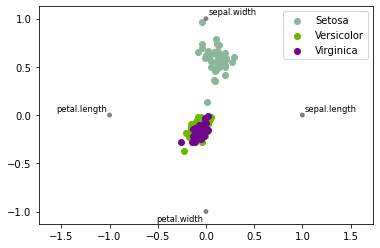

In [19]:
plt.figure() #Instanciando a plotagem da figura:
radviz(df_pd, 'variety') #Plotagem o gráfico:

scatter plot é o famoso gráfico de dispersão,



O código abaixo percorre as 150 linhas do dataframe verificando a coluna 'variety' para mudar a cor no gráfico de dispersão

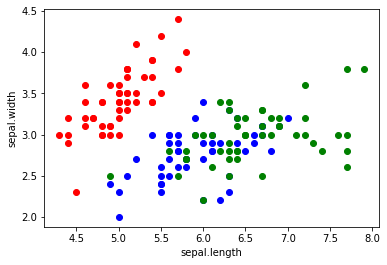

In [20]:
for n in range(0,150):
    if df_pd['variety'][n] == 'Setosa':
        plt.scatter(df_pd['sepal.length'][n],df_pd['sepal.width'][n],color='red')
        plt.xlabel('sepal.length')
        plt.ylabel('sepal.width')
    elif df_pd['variety'][n] == 'Versicolor':
        plt.scatter(df_pd['sepal.length'][n],df_pd['sepal.width'][n],color='blue')
    else:
        plt.scatter(df_pd['sepal.length'][n],df_pd['sepal.width'][n],color='green')

Geração de gráficos com a bibliotéca Seaborn, que gera visualizações um pouco mais "bonitinhas" que o matplotlib puro

In [21]:
import seaborn as sns

In [ ]:
sns.countplot(df_pd["variety"]) # para variaveis categóricas

In [ ]:
sns.lineplot('petal.length', 'petal.width', hue='variety', style='variety', data=df_pd)

face grid: cores para as classes, escala de visualização, adicona legenda

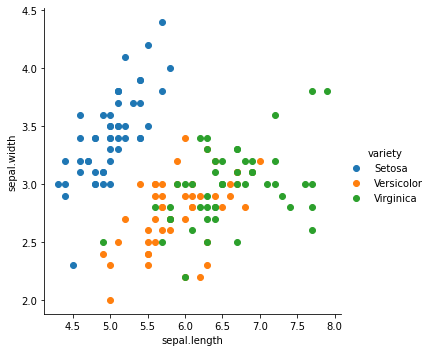

In [22]:
sns.FacetGrid(df_pd, hue="variety", size=5).map(plt.scatter,'sepal.length','sepal.width').add_legend()

Agora vamos brincar com outras "ferramentinhas" / comandinhos da biblioteca seaborn

#traça uma linha de regressão para todo dataframe sem distinção de classe

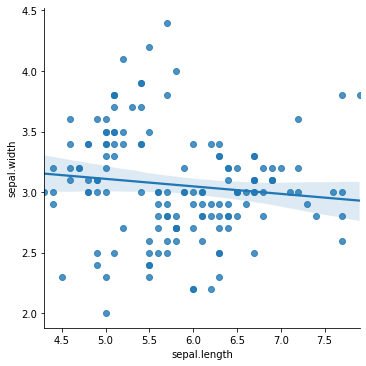

In [23]:
sns.lmplot(x='sepal.length',y='sepal.width',data=df_pd) 

#traça uma linha de regressão para todo dataframe agrupando por classe

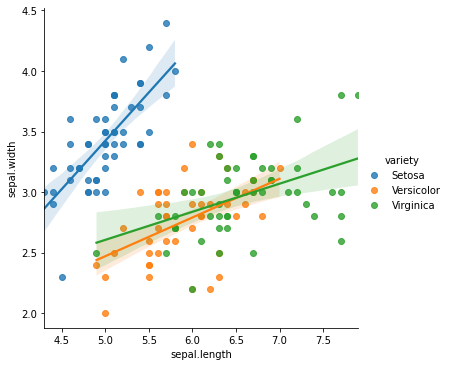

In [24]:
sns.lmplot(x='sepal.length',y='sepal.width',data=df_pd,hue='variety')

#traça uma linha de regressão para todo dataframe agrupando por classe, mostrando separadamente

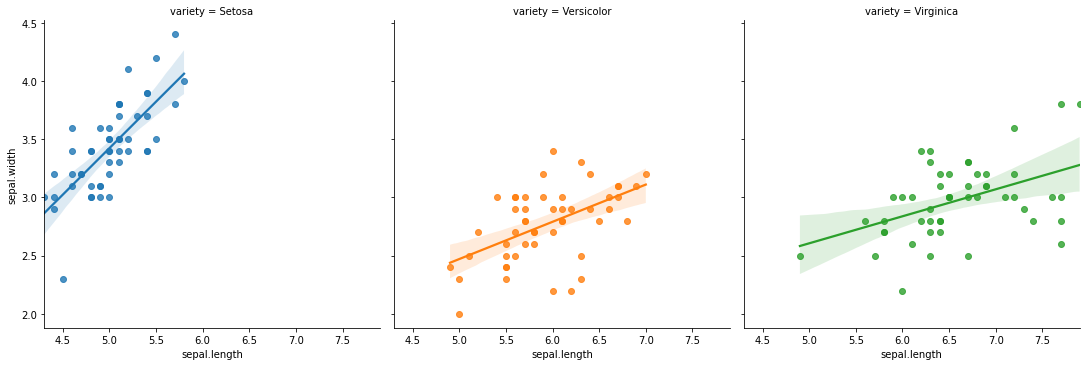

In [25]:
sns.lmplot(x='sepal.length',y='sepal.width',data=df_pd,hue='variety', col='variety') #visualizando individualmente

Markdown para o item abaixo

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

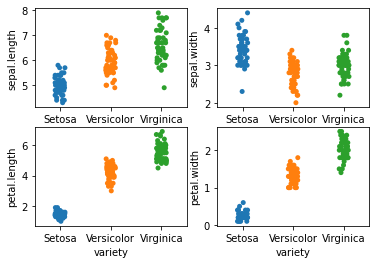

In [26]:
plt.subplot(2,2,1)
sns.stripplot(x="variety", y="sepal.length", data=df_pd, jitter=True)
plt.subplot(2,2,2)
sns.stripplot(x="variety", y="sepal.width", data=df_pd, jitter=True)
plt.subplot(2,2,3)
sns.stripplot(x="variety", y="petal.length", data=df_pd, jitter=True)
plt.subplot(2,2,4)
sns.stripplot(x="variety", y="petal.width", data=df_pd, jitter=True)

boxplot, um dos meus preferidos :)

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

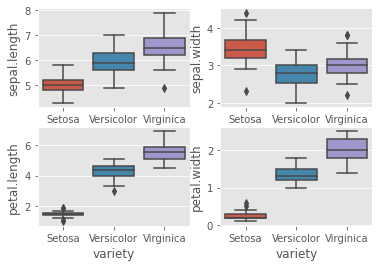

In [27]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x="variety", y="sepal.length", data=df_pd)
plt.subplot(2,2,2)
sns.boxplot(x="variety", y="sepal.width", data=df_pd)
plt.subplot(2,2,3)
sns.boxplot(x="variety", y="petal.length", data=df_pd)
plt.subplot(2,2,4)
sns.boxplot(x="variety", y="petal.width", data=df_pd)

"box plot" violino

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

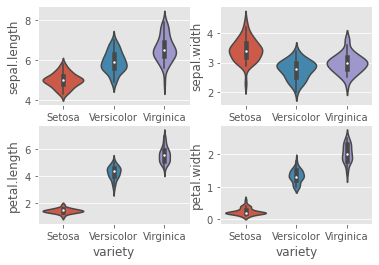

In [28]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x="variety", y="sepal.length", data=df_pd)
plt.subplot(2,2,2)
sns.violinplot(x="variety", y="sepal.width", data=df_pd)
plt.subplot(2,2,3)
sns.violinplot(x="variety", y="petal.length", data=df_pd)
plt.subplot(2,2,4)
sns.violinplot(x="variety", y="petal.width", data=df_pd)

analisar todos os dados de uma vez, dá pra perceber correlação, densidades, hitograma

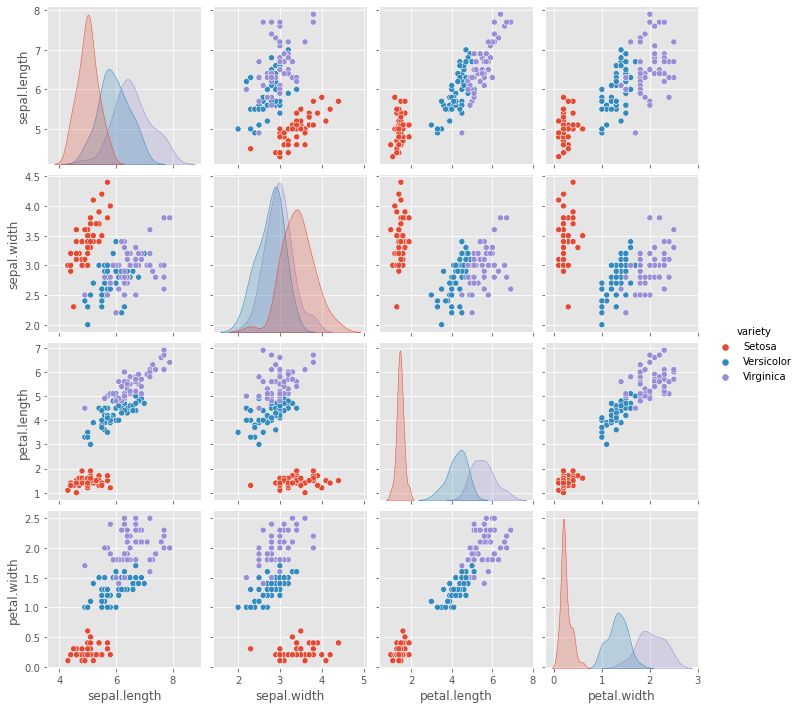

In [29]:
sns.pairplot(df_pd,hue="variety")

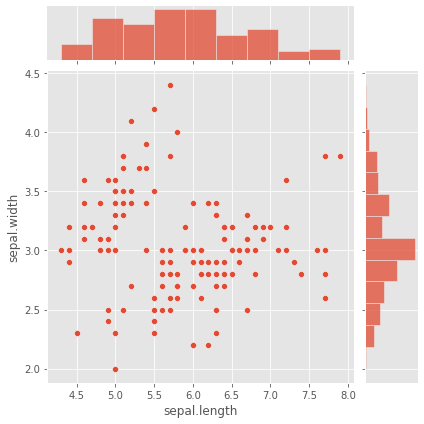

In [30]:
sns.jointplot(x="sepal.length",y="sepal.width", data=df_pd) # dispersão + concentração

residuos

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

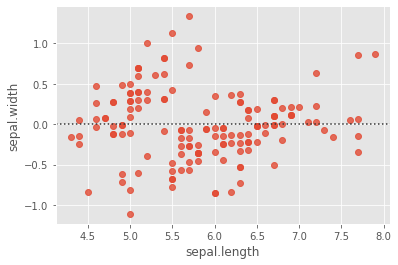

In [32]:
sns.residplot(x='sepal.length',y='sepal.width',data=df_pd)

<AxesSubplot:xlabel='variety', ylabel='count'>

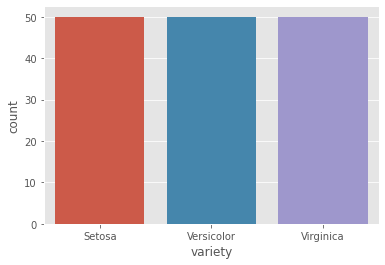

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

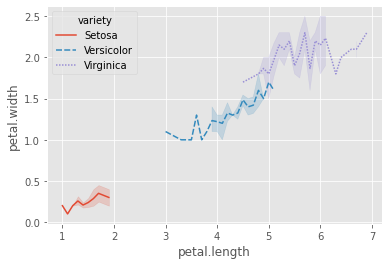